Este documento está inspirado en esta serie de videos ([link](https://www.youtube.com/watch?v=iX_on3VxZzk&list=PLZ8REt5zt2Pn0vfJjTAPaDVSACDvnuGiG&index=1)), se recomienda que los revisen, ya que de es de los pocos canales en español que explica este tipo de cosas de manera amena y acertada

# Redes neuronales para hacer fits (entonctrar valores numéricos de datos)

## Ej: Celcius a Fahrenheit

La equación que describe la conversión es:
$$
\text{F} = (\text{C} \cdot a) + b
$$

Sabemos que la conversión dice que $a=9/5$ y $b=32$, sin embargo veremos si el modelo de redes es capaz de predecir este mismo número (9/5 = 1.8)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cel2far(celcius):
    return (celcius * 9/5) + 32


celcius_values = np.arange(-40, 40, 5)
farenheit_values = cel2far(celcius_values)

In [ ]:
# modelo simple 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
])

model1.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

hist1 = model1.fit(celcius_values, farenheit_values, epochs=500, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1/1 - 1s - 1s/step - loss: 5605.8022
Epoch 2/500
1/1 - 0s - 136ms/step - loss: 5292.0068
Epoch 3/500
1/1 - 0s - 51ms/step - loss: 4989.1895
Epoch 4/500
1/1 - 0s - 42ms/step - loss: 4697.5269
Epoch 5/500
1/1 - 0s - 57ms/step - loss: 4417.1782
Epoch 6/500
1/1 - 0s - 38ms/step - loss: 4148.2749
Epoch 7/500
1/1 - 0s - 32ms/step - loss: 3890.9243
Epoch 8/500
1/1 - 0s - 89ms/step - loss: 3645.2092
Epoch 9/500
1/1 - 0s - 122ms/step - loss: 3411.1802
Epoch 10/500
1/1 - 0s - 75ms/step - loss: 3188.8584
Epoch 11/500
1/1 - 0s - 30ms/step - loss: 2978.2322
Epoch 12/500
1/1 - 0s - 32ms/step - loss: 2779.2576
Epoch 13/500
1/1 - 0s - 62ms/step - loss: 2591.8552
Epoch 14/500
1/1 - 0s - 75ms/step - loss: 2415.9109
Epoch 15/500
1/1 - 0s - 52ms/step - loss: 2251.2744
Epoch 16/500
1/1 - 0s - 41ms/step - loss: 2097.7585
Epoch 17/500
1/1 - 0s - 84ms/step - loss: 1955.1411
Epoch 18/500
1/1 - 0s - 39ms/step - loss: 1823.1636
Epoch 19/500
1/1 - 0s - 57ms/step - loss: 1701.5325
Epoch 20/500
1/1 - 0s

In [ ]:
# modelo simple 2
model2 = tf.keras.Sequential([
    # Ahora lo hacemos con 3 capas densas de 10 neuronas
    tf.keras.layers.Dense(units=10, input_shape=[1]),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

hist2 = model2.fit(celcius_values, farenheit_values, epochs=500, verbose=2)

Epoch 1/500
1/1 - 2s - 2s/step - loss: 2134.6714
Epoch 2/500
1/1 - 0s - 38ms/step - loss: 1213.3431
Epoch 3/500
1/1 - 0s - 56ms/step - loss: 1278.8887
Epoch 4/500
1/1 - 0s - 57ms/step - loss: 838.8782
Epoch 5/500
1/1 - 0s - 28ms/step - loss: 1051.2812
Epoch 6/500
1/1 - 0s - 58ms/step - loss: 669.2347
Epoch 7/500
1/1 - 0s - 59ms/step - loss: 746.4984
Epoch 8/500
1/1 - 0s - 61ms/step - loss: 643.2913
Epoch 9/500
1/1 - 0s - 58ms/step - loss: 430.9273
Epoch 10/500
1/1 - 0s - 58ms/step - loss: 469.7918
Epoch 11/500
1/1 - 0s - 56ms/step - loss: 309.9711
Epoch 12/500
1/1 - 0s - 43ms/step - loss: 196.5634
Epoch 13/500
1/1 - 0s - 50ms/step - loss: 217.3828
Epoch 14/500
1/1 - 0s - 60ms/step - loss: 65.8471
Epoch 15/500
1/1 - 0s - 28ms/step - loss: 52.5345
Epoch 16/500
1/1 - 0s - 28ms/step - loss: 76.5579
Epoch 17/500
1/1 - 0s - 59ms/step - loss: 66.6673
Epoch 18/500
1/1 - 0s - 59ms/step - loss: 162.5708
Epoch 19/500
1/1 - 0s - 60ms/step - loss: 89.1943
Epoch 20/500
1/1 - 0s - 58ms/step - loss: 1

Podemos visualizar cómo le fue en el entrenamiento a ambos modelos

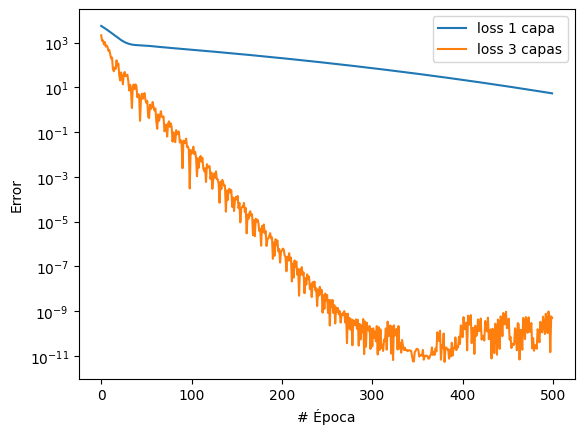

In [ ]:
# ver el entrnamiento
plt.xlabel("# Época")
plt.ylabel("Error")

plt.yscale('log')
# plt.ylim([0, 1e-2])
# plt.xlim([800, 1000])

plt.plot(hist1.history["loss"], label='loss 1 capa')
plt.plot(hist2.history["loss"], label='loss 3 capas')
plt.legend()

Es claro que el modelo con 3 capas se entrenó muchisimo mejor que el modelo con solo 1 capa y 1 neurona.

In [ ]:
# comparar modelo con valor real

cel_val = 100.0

print(f'Para {cel_val}°C, el modelo 1 predijo: {model1.predict(np.array([cel_val]))[0][0]}°F, error = {np.abs(model1.predict(np.array([cel_val]))[0][0] - cel2far(cel_val))}')
print(f'Para {cel_val}°C, el modelo 2 predijo: {model2.predict(np.array([cel_val]))[0][0]}°F, error = {np.abs(model2.predict(np.array([cel_val]))[0][0] - cel2far(cel_val))}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Para 100.0°C, el modelo 1 predijo: 208.5641632080078°F, error = 3.4358367919921875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Para 100.0°C, el modelo 2 predijo: 212.0°F, error = 0.0


In [ ]:
# Podemos ver qué tal lo hizo el modelo1 (a=1.8 y b=32)
model1.layers[0].get_weights()


[array([[1.7888918]], dtype=float32), array([29.674988], dtype=float32)]

Si nos fijamos, encontró que a~1.788 y b=29.42

In [ ]:
# Intentar ver lo mismo para el modelo2 es más una caja negra
model2.layers[0].get_weights()


[array([[-0.05990643, -0.12051862,  0.06947812,  0.03054895, -0.04846928,
          0.11272417,  0.37628075,  0.04897349, -0.5083906 ,  0.10446266]],
       dtype=float32),
 array([-0.7955404 , -0.7566208 ,  1.5181762 ,  0.3933181 , -0.61036277,
         1.2664768 ,  1.9188601 ,  1.42763   , -1.8522196 ,  1.6741114 ],
       dtype=float32)]

# Redes neuronales convolucionales

## Clasificar ropa

Para ver más de los datasets, ver [Tensorflow Datasets](https://www.tensorflow.org/datasets/overview?hl=es-419)

In [ ]:
import tensorflow_datasets as tfds

#Descargar set de datos de Fashion MNIST de Zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [ ]:
#Imprimir los metadatos para ver que trae el set
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    =

In [ ]:
#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
data_train, data_test = datos['train'], datos['test']

In [ ]:
#Etiquetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names

In [ ]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Es una buena constumbre el normalizar las imágenes. Para imágenes de este estilo (de internet), van de 0-255, por el RGB. Dividirlas por 255 las deja entonces de 0-1.

Ojo, en astronomía las imágenes que usamos no siguen esta regla, ya que los valores ya no representan un color, si no un valor físico (generalmente el flujo), por lo que en esos casos se suelen normalizar por el valor máximo en lugar de 255!

In [ ]:

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar el test y train set
data_train = data_train.map(normalizar)
data_test = data_test.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
data_train = data_train.cache()
data_test = data_test.cache()

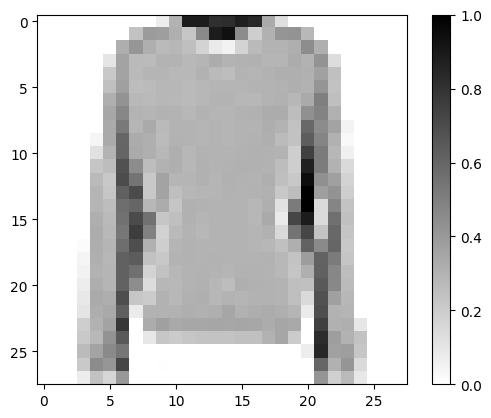

In [ ]:
#Mostrar una imagen de los datos de pruebas, de momento mostremos la primera
for imagen, etiqueta in data_train.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores

import matplotlib.pyplot as plt

#Dibujar dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

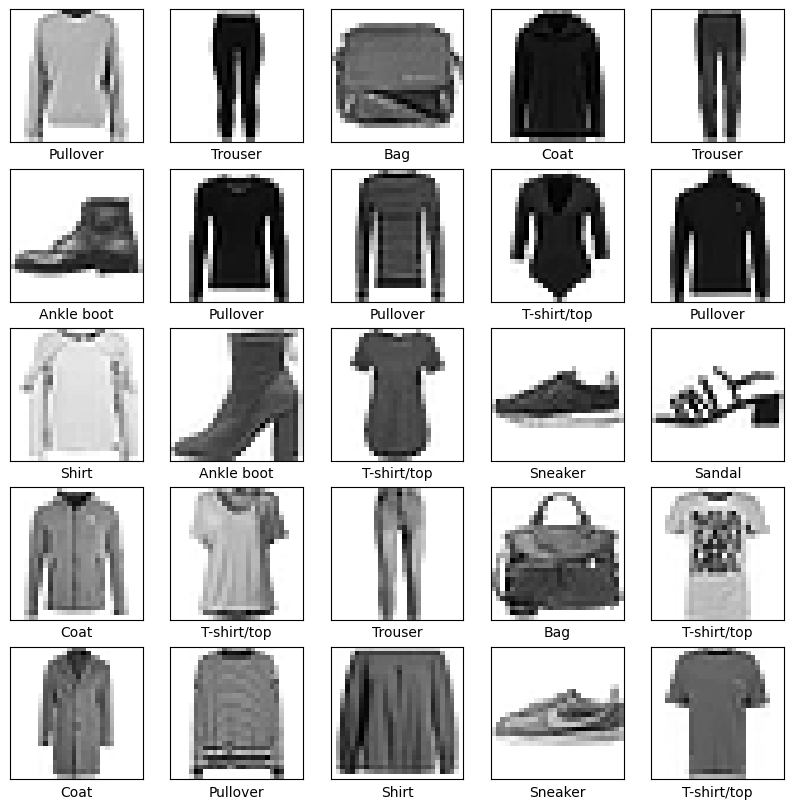

In [ ]:
#mostrar más
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(data_train.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
# Crear el modelo CNN
modelo = tf.keras.Sequential([

    # ------- SECCIÓN CONVOLUCIONAL -------
    # Capa convolucional con 32 filtros de 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Capa de max pooling de 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Segunda capa convolucional con 64 filtros de 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Otro max pooling de 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Con el Flatten convertimos esta secuencia de tensores en un vector
    tf.keras.layers.Flatten(),

    # ------- SECCIÓN RED NEURONAL -------
    # Capa densa de 50 neuronas
    tf.keras.layers.Dense(50, activation='relu'),
    # Capa de salida con 10 neuronas (10 categorías)
    tf.keras.layers.Dense(10, activation='softmax')
])

# Podemos ver la arquitectura del modelo
modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │          80,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,376 (388.19 KB)

 Trainable params: 99,376 (388.19 KB)

 Non-trainable params: 0 (0.00 B)

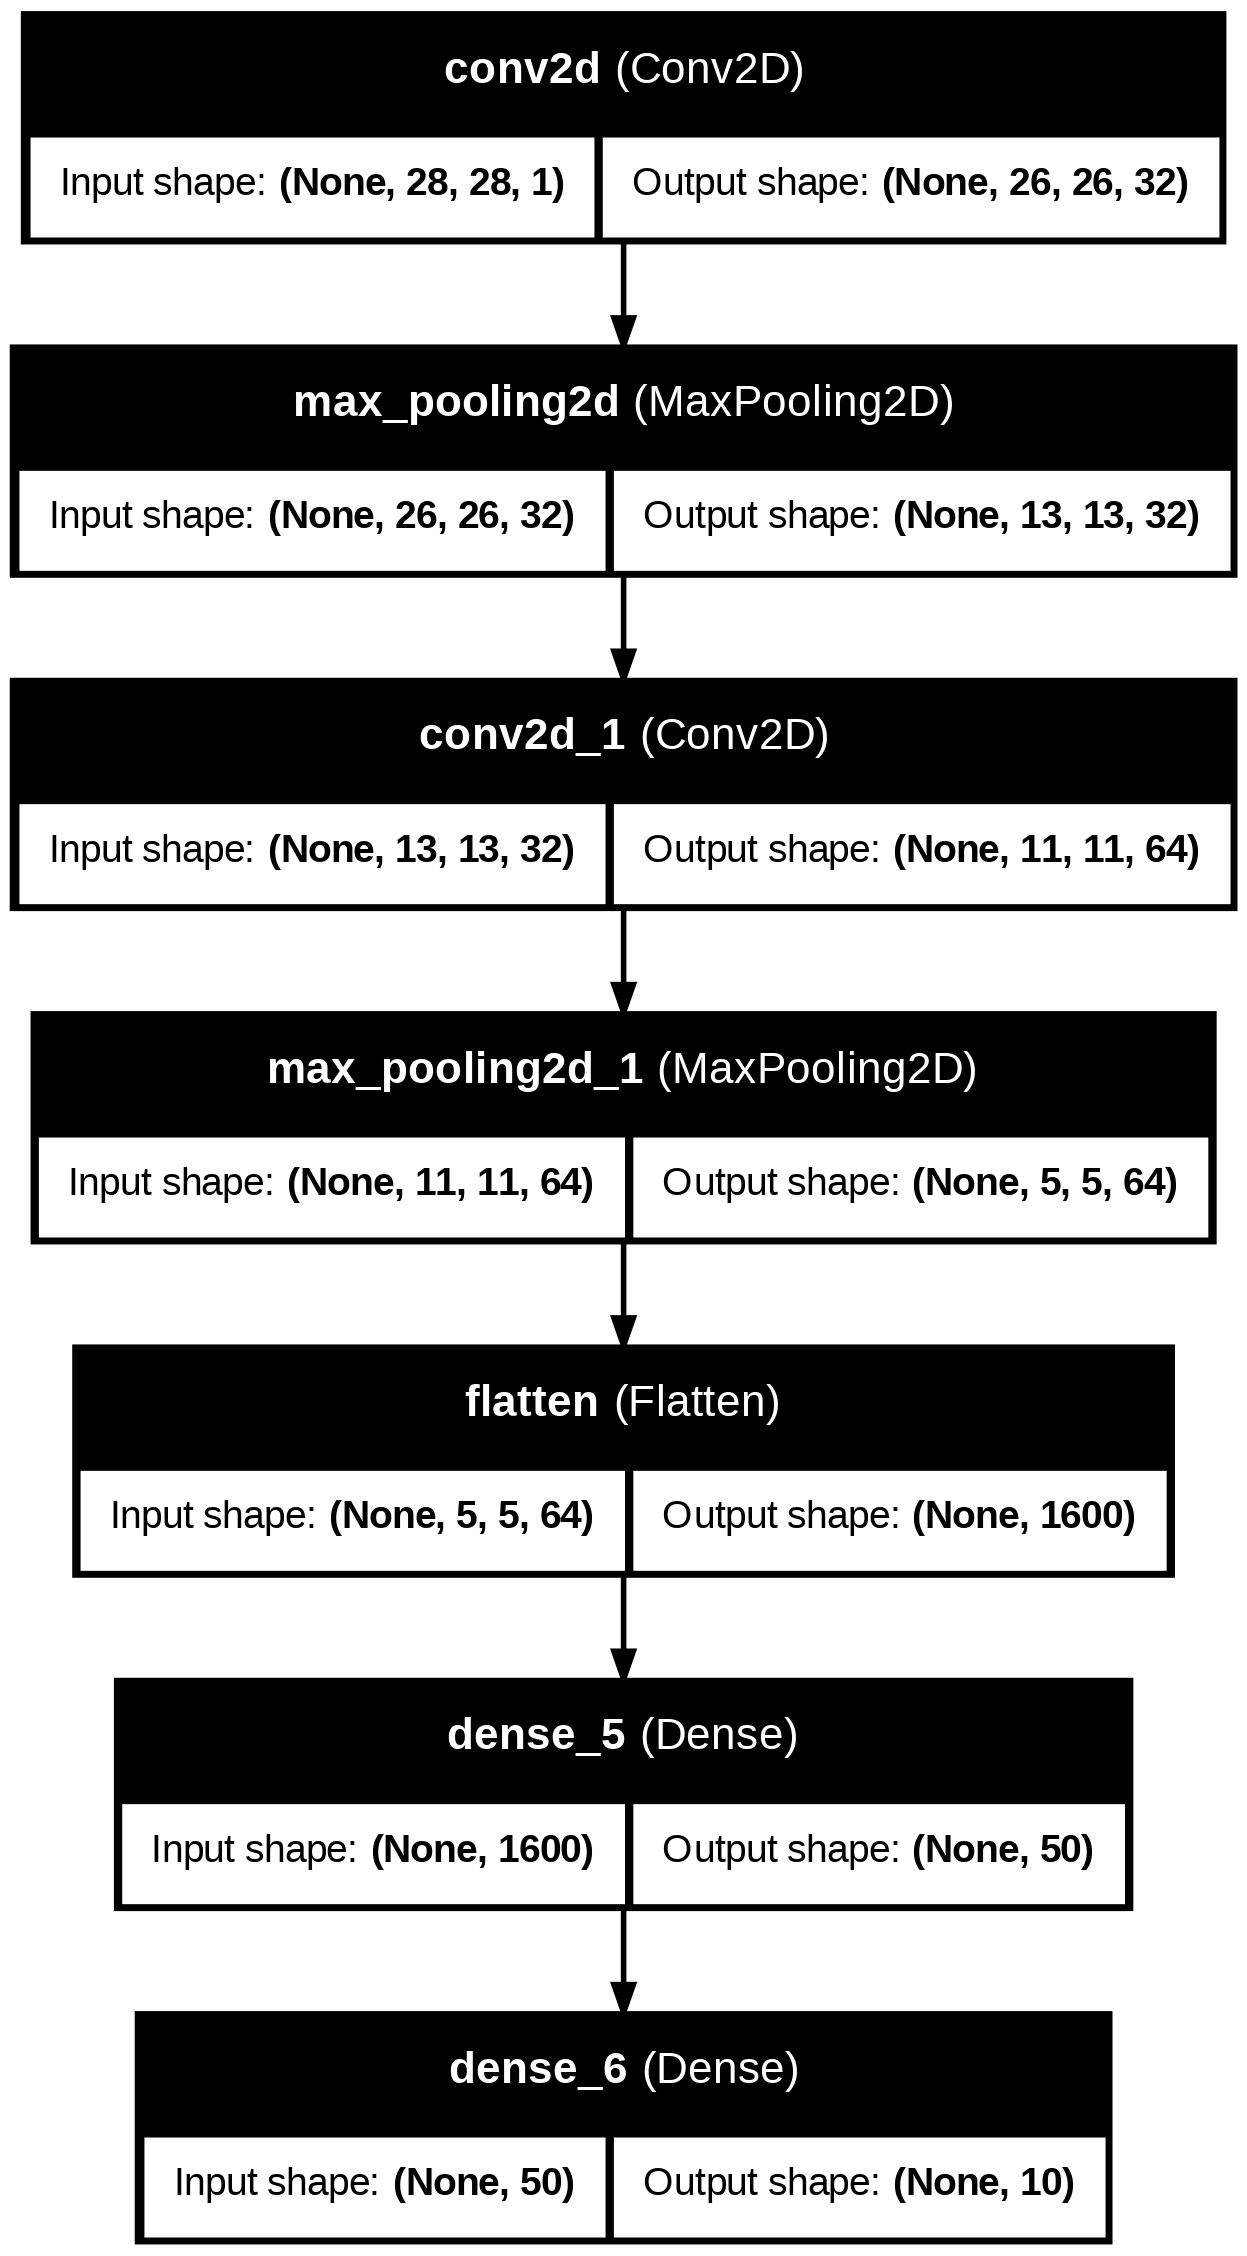

In [ ]:
# Pero también podemos ver la arquitectura en mayor detalle
tf.keras.utils.plot_model(modelo, show_shapes=True, show_layer_names=True)

Hay herrameintas online que también facilitan la interpretación de la arquitectura del modelo y otras características ([ver neptune](https://neptune.ai/blog/deep-learning-visualization))

In [ ]:
# Compile the model with additional metrics
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)



In [ ]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [ ]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [ ]:
from sklearn.model_selection import train_test_split
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
data_train = data_train.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)

data_test = data_test.batch(TAMANO_LOTE)

In [ ]:
import math

#Entrenar
historial = modelo.fit(data_train, epochs=40, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7602 - loss: 0.6640
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8832 - loss: 0.3283
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8953 - loss: 0.2872
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9075 - loss: 0.2500
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9197 - loss: 0.2225
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.2059
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9307 - loss: 0.1836
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9351 - loss: 0.1750
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9400 - loss: 0.1626
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.1497
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9481 - loss: 0.1387
Epoch 12/40
1875/1875 ━━━━━━━

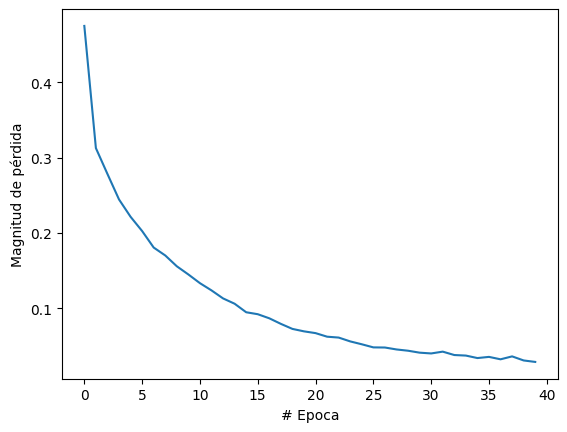

In [ ]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


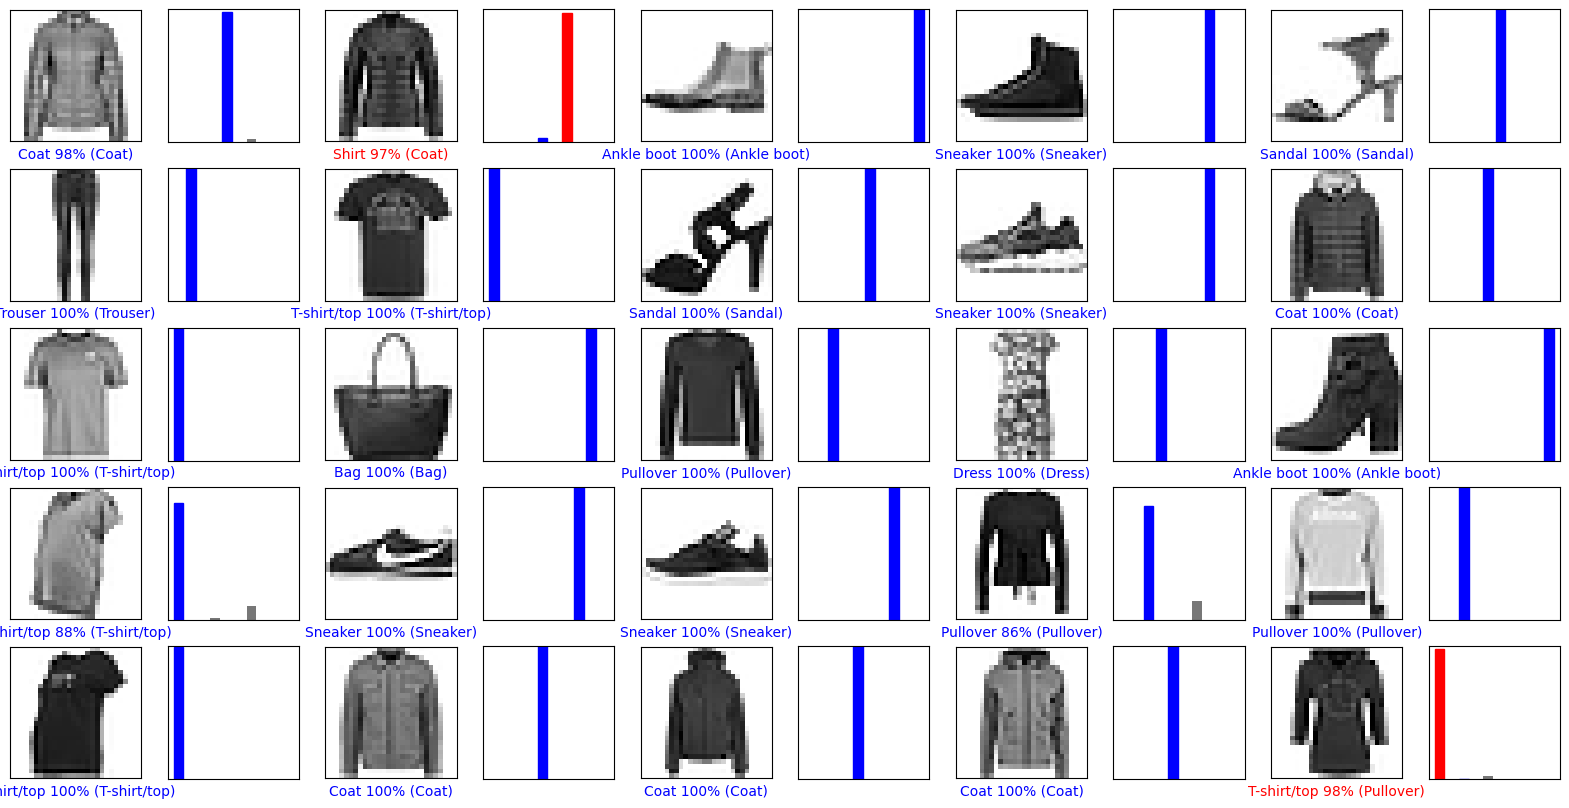

In [ ]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in data_test.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


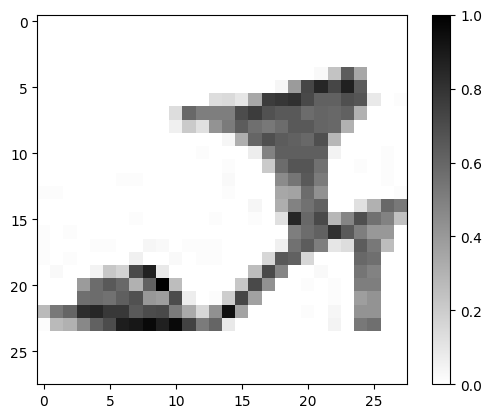

Prediccion: Sandal, con un 100.0% de certeza


In [ ]:
#Probar una imagen suelta
imagen = imagenes_prueba[4]
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

plt.figure()
plt.imshow(imagen[0,:,:,0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])] + ", con un " + str(np.max(prediccion[0])*100) + "% de certeza")

El modelo funciona muy bien! pero qué pasa si la rotamos?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


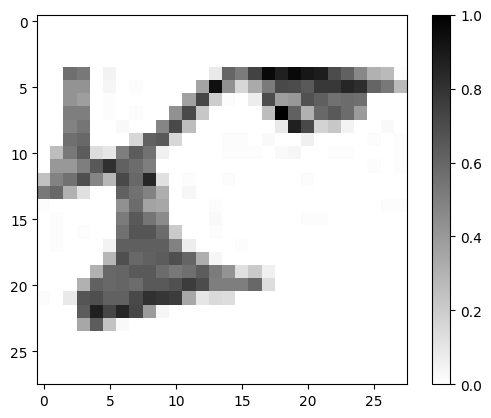

Prediccion: Bag, con un 99.14600849151611% de certeza


In [ ]:
def rotate_imagen(img, k=1):
    # La imagen tiene shape 1, 28, 28, 1
    img_rot = img.copy()
    img_rot = np.rot90(img_rot, k=k, axes=(1, 2))
    return img_rot

#Probar una imagen suelta
rot_imagen = rotate_imagen(imagen, 2)
prediccion = modelo.predict(rot_imagen)

plt.figure()
plt.imshow(rot_imagen[0,:,:,0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])] + ", con un " + str(np.max(prediccion[0])*100) + "% de certeza")

El modelo falla, y además entrega una certeza altísima para el error! Por eso es importante rotar las imágenes al entrenar

## Clasificar números

Haremos una comparacion de redes neuronales con otros algoritmos. Para esto usaremos el dataset de números.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

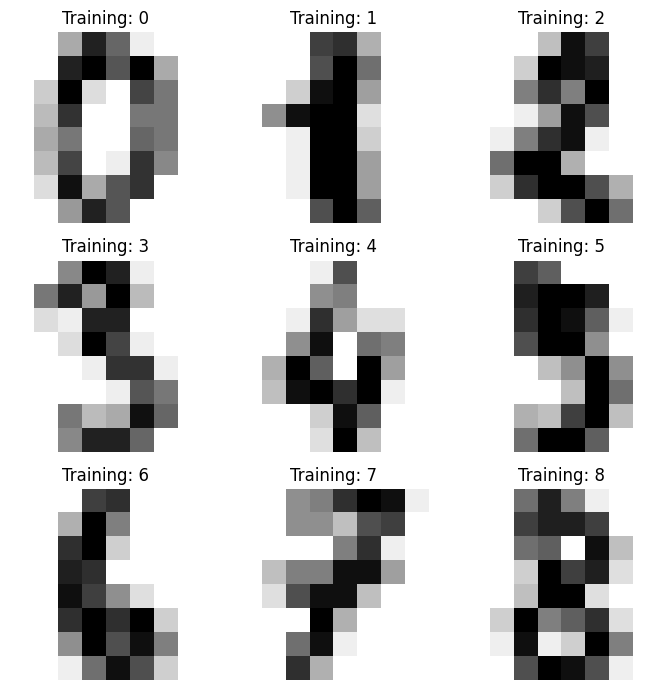

In [ ]:
# Cargamos el conjunto de datos
digits = datasets.load_digits()

# Creamos la figura y los ejes para un gráfico 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(7, 7))


for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


plt.tight_layout()
plt.show()

Para procesar las imagenes en algoritmos de clasificacion (No CNN), debemos "aplanar" la imagen, es decir, pasar de una matriz a un vector

In [ ]:
# pre procesamiento
n_samples = len(digits.images)
digits_flatten = digits.images.reshape((n_samples, -1))

# Creamos un clasificador de SVM
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits_flatten, digits.target, test_size=0.5, shuffle=False
)

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Generamos las predicciones
predicted = clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, predicted)
print(accuracy_svm)


0.9688542825361512


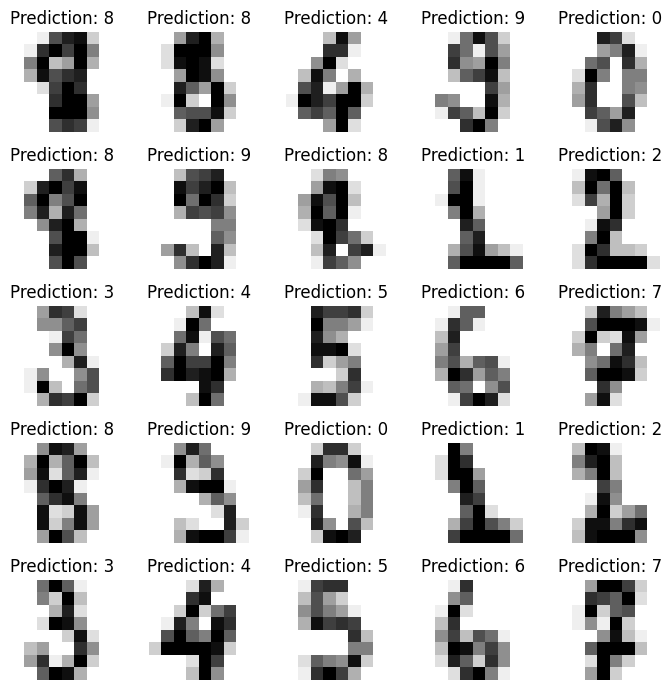

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7, 7))


for ax, image, prediction in zip(axes.ravel(), X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


plt.tight_layout()
plt.show()

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


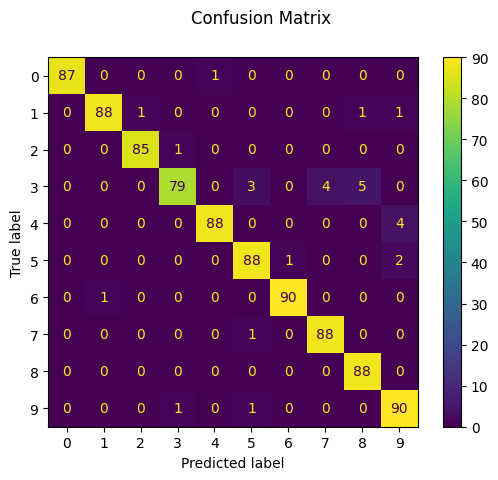

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X = digits.images
y = digits.target

# Preprocesar los datos
X = X.reshape((X.shape[0], 8, 8, 1)).astype('float32') / 16.0  # Normalizar
y = keras.utils.to_categorical(y, num_classes=10)  # One-hot encoding

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Definir la arquitectura de la red neuronal convolucional
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Hacer predicciones (opcional)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3696 - loss: 2.0645 - val_accuracy: 0.8509 - val_loss: 0.7762
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8536 - loss: 0.5905 - val_accuracy: 0.9010 - val_loss: 0.3320
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9203 - loss: 0.3200 - val_accuracy: 0.9266 - val_loss: 0.2826
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9486 - loss: 0.1972 - val_accuracy: 0.9321 - val_loss: 0.2154
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9615 - loss: 0.1342 - val_accuracy: 0.9422 - val_loss: 0.2028
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9581 - loss: 0.1167 - val_accuracy: 0.9388 - val_loss: 0.2076
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9775 - loss: 0.0884 - val_accuracy: 0.9555 - val_loss: 0.1559
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9754 - loss: 0.0731 - val_accuracy: 0.9633 - val_loss: 0.1422
Ep

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Confusion matrix:
[[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  2 82  0  1  0  2  6  0]
 [ 0  0  0  0 93  0  0  0  0  0]
 [ 1  1  1  1  1 92  1  0  0  1]
 [ 2  0  0  0  0  0 96  0  0  0]
 [ 0  0  0  0  0  0  0 87  0  0]
 [ 0  1  0  0  0  1  0  1 80  0]
 [ 0  0  0  0  0  0  0  0  2 90]]


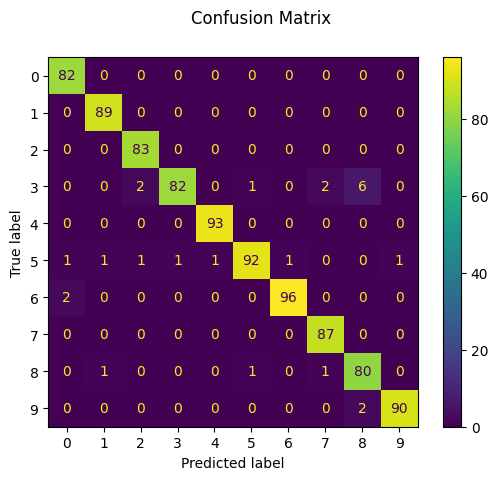

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
print('accuracy NN: ', test_acc)
print('accuracy SVM: ', accuracy_svm)

accuracy NN:  0.972191333770752
accuracy SVM:  0.9688542825361512


# Redes neuronales recurrentes

Pequeño ejemplo de redes neuronales recurrentes. La base de datos corresponde a comentarios de peliculas. En base a las palabras que se indroducen de cada comentario, la red trata de deducir si el comentario es positivo o negativo.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
# Cargamos el conjunto de datos IMDB
max_features = 10000  # Consideramos las 10,000 palabras más frecuentes
maxlen = 100  # Cortar las secuencias después de este número de palabras

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Rellenar las secuencias para que todas tengan la misma longitud
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Definimos la arquitectura de la RNN
model = keras.Sequential([
    layers.Embedding(max_features, 128),  # Capa de embedding
    layers.SimpleRNN(128),  # Capa RNN
    layers.Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluamos el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5690 - loss: 0.6676 - val_accuracy: 0.6546 - val_loss: 0.6032
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7478 - loss: 0.5160 - val_accuracy: 0.7878 - val_loss: 0.4669
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8436 - loss: 0.3652 - val_accuracy: 0.7576 - val_loss: 0.4938
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8556 - loss: 0.3464 - val_accuracy: 0.6152 - val_loss: 0.6480
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7338 - loss: 0.5218 - val_accuracy: 0.7828 - val_loss: 0.5036
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7809 - loss: 0.4975
Test accuracy: 0.7848


<ipython-input-39-c4dddc8b8983>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


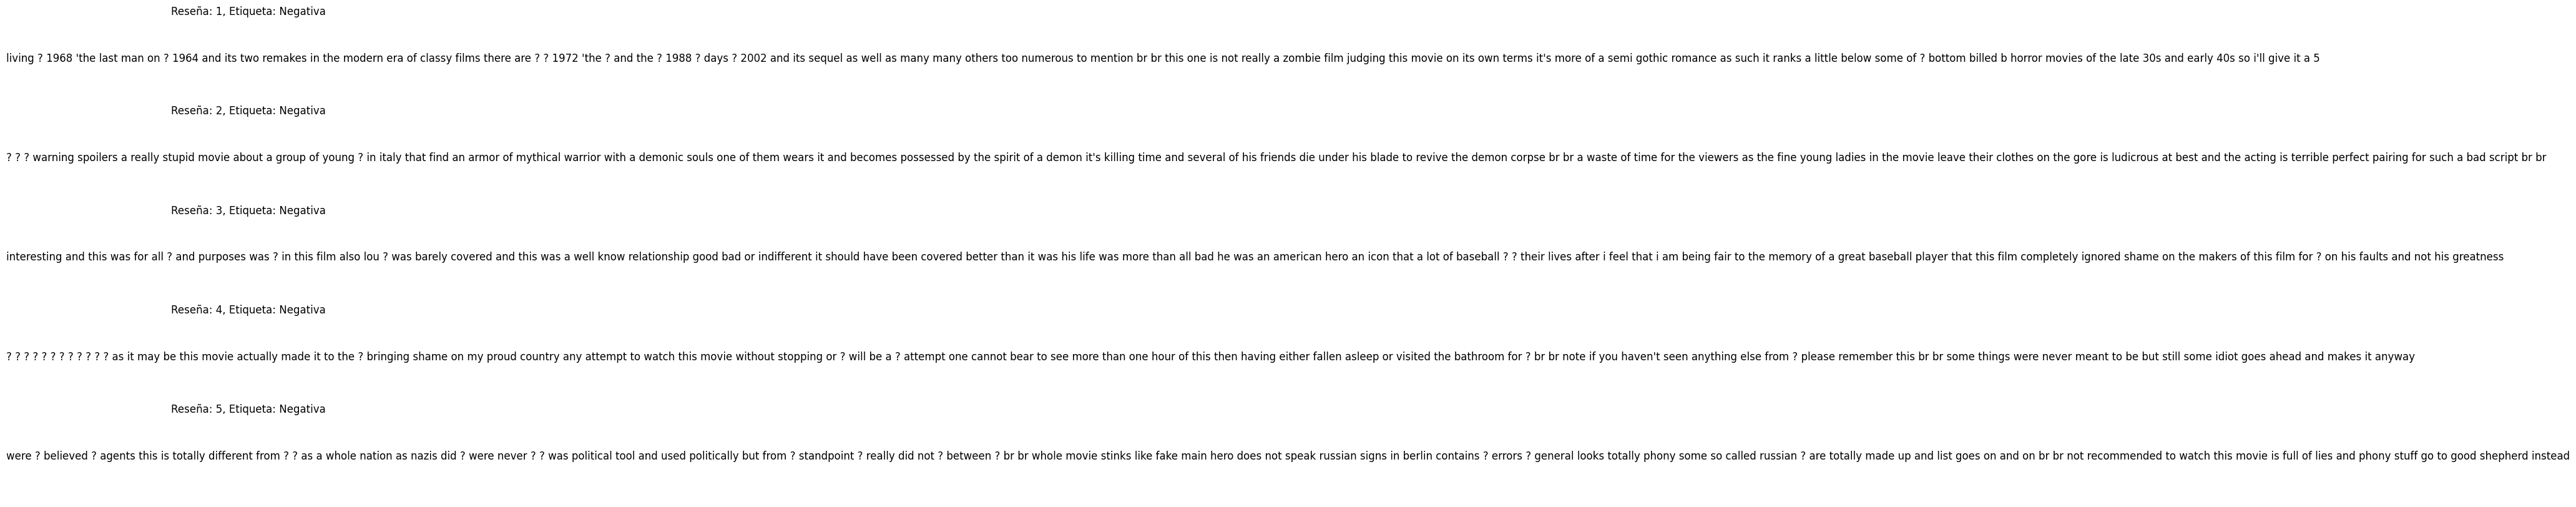

In [ ]:
# Funcion para visualizar comentarios
def decode_review(encoded_review):
    # Cargar el índice de palabras
    word_index = imdb.get_word_index()
    # Invertir el índice de palabras
    reverse_word_index = {v: k for k, v in word_index.items()}
    # Decodificar la reseña
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])
    return decoded_review

# Extraer ejemplos para visualizar
num_examples = 5
indices = np.random.randint(0, len(X_train), size=num_examples)

# Visualizar ejemplos
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(num_examples, 1, i + 1)
    review_text = decode_review(X_train[idx])
    plt.text(0, 0.5, review_text, fontsize=12)
    plt.title(f'Reseña: {i + 1}, Etiqueta: {"Positiva" if y_train[idx] == 1 else "Negativa"}')
    plt.axis('off')

plt.tight_layout()
plt.show()